# Decision Tree 실습

## 1. DecisionTree Classifier

In [11]:
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [9]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 핵심 파라미터

- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터수 ( 과적합을 제어하는데 사용 )
  - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
- min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수, min_samples_split과 함께 과적합 제어 용도,불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요
- max_features: 최적의 분할을 위해 고려할 최대 feature 개수
  - Default = None → 데이터 세트의 모든 피처를 사용, int형으로 지정 →피처 갯수 / float형으로 지정 →비중, sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정, log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정
- max_depth : 트리의 최대 깊이
  - default = None → 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할, 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
- max_leaf_nodes: 리프노드의 최대 개수

In [12]:
# 트리 학습하기
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [13]:
# 학습된 모델을 test 데이터로 테스트해보고, 정확도도 구해봅시다.

from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.98


In [15]:
# Decision Tree 시각화
!pip install graphviz

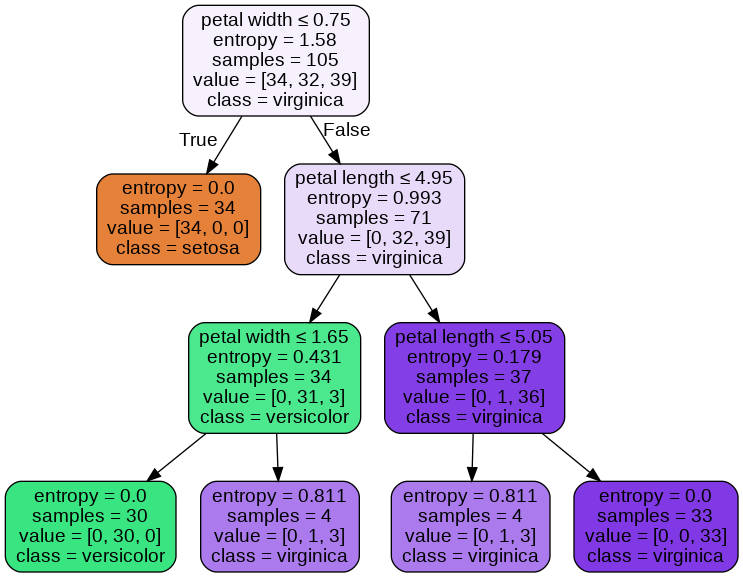

In [16]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 2. 실습 과제 - DecisionRegressor 구현해보기
* 데이터셋: 자유롭게 선택
* 예측 및 실제 데이터 시각화까지!

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz 

In [ ]:
# 데이터 로드 및 분리

def fit_model(data, target):

X_train, X_test, y_train, y_test = 


In [ ]:
# 모델 fitting

regression = fit_model(X_train, y_train)

In [ ]:
# 회귀선 시각화 (hint: for문 사용)


In [ ]:
# tree 시각화
export_graphviz(regression_f, out_file ='tree.dot') 
with open("tree.dot") as f:
    dot_graph = f.read()

# 이미지화
pydot_graph = pydotplus.graph_from_dot_file("tree.dot")
Image(pydot_graph.create_png())

# Bagging & Ensemble 실습

# 0. Voting 예제

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 데이터
X = np.array([[-1, -1, -10], [-3, -2, 9], [1, 5, 5], [2, 10, 2], [3, 2, -5]])
y = np.array([1, 1, 2, 2, 2])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf_soft = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf_soft = eclf_soft.fit(X, y)

eclf_hard = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf_hard = eclf_hard.fit(X, y)

print('Soft voting 방법:', eclf_soft.predict(X))
print('Hard voting 방법:', eclf_soft.predict(X))

Soft voting 방법: [1 1 2 2 2]
Hard voting 방법: [1 1 2 2 2]


# 1. Bagging 회귀

## 1.1 데이터셋 준비

In [ ]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes

raw_boston = load_boston()
boston_data = pd.DataFrame(raw_boston.data, columns = raw_boston.feature_names)
boston_data['target'] = raw_boston.target
boston_data.head()

In [ ]:
# 데이터 사이즈 확인
boston_data.shape

In [ ]:
from sklearn.model_selection import train_test_split
# 데이터셋 분리
bs_X_train, bs_X_test, bs_y_train, bs_y_test = train_test_split(raw_boston.data, raw_boston.target,
                                                    test_size=0.3, random_state=42)
print('X_train의 shape:', bs_X_train.shape)
print('X_test의 shape:', bs_X_test.shape)
print('y_train의 shape:', bs_y_train.shape)
print('y_test의 shape:', bs_y_test.shape)

## 1.2 Bagging 회귀 모델 만들기
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html
- 주요 파라미터:
    - base_estimator
    - n_estimators
    - max_samples
    - max_features
    - bootstrap
    - bootstrap_features

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [ ]:
reg_tree = DecisionTreeRegressor(random_state = 42)
reg_bagg = BaggingRegressor(base_estimator = reg_tree,
                            n_estimators =10, random_state = 42)

reg_bagg = reg_bagg.fit(bs_X_train, bs_y_train)
bs_pred_test = reg_bagg.predict(bs_X_test)

In [ ]:
from sklearn.metrics import mean_squared_error # 평균 제곱 오차

mean_squared_error(bs_pred_test, bs_y_test)

# 2. Bagging 분류

## 2.1 데이터셋 준비

In [ ]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

raw_data = load_iris()
data = pd.DataFrame(raw_data.data, columns = raw_data.feature_names)
data['class'] = raw_data.target
data.head()

In [ ]:
data['class'].value_counts()

In [ ]:
# 데이터 사이즈 확인
data.shape

In [ ]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_data.data, raw_data.target,
                                                    test_size = 0.3, random_state = 0)
print('X_train의 shape:', X_train.shape)
print('X_test의 shape:', X_test.shape)
print('y_train의 shape:', y_train.shape)
print('y_test의 shape:', y_test.shape)

## 2.2 Bagging 분류 모델 만들기
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
- 주요 파라미터
    - base_estimator:
    - n_estimators
    - max_samples
    - max_features
    - bootstrap
    - bootstrap_features

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
bagging_classifier = BaggingClassifier(base_estimator = neigh,
                                       n_estimators=5, bootstrap=True)

bagging_classifier = bagging_classifier.fit(X_train, y_train)
pred_test = bagging_classifier.predict(X_test)

print('acc score:', round(accuracy_score(y_test, pred_test), 3)) # accuracy_score

# 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)

print('랜덤 포레스트 acc:', round(accuracy_score(y_test , pred), 3))

In [ ]:
# 변수 중요도 보기
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = data.columns[:4])
ftr = ftr_importances.sort_values(ascending=False)[:4] # 10
ftr

In [ ]:
# 변수 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,5))
plt.title('Iris Data Feature Importances')
sns.barplot(x = ftr, y = ftr.index)
plt.show()

# 4. 실습 과제 - 배깅 구현해보기 
* 분류, 회귀 둘 중 하나 구현해보기
* 데이터셋: 자유롭게 선택
* Hint) for문과 random 이용

In [ ]:
# 데이터셋 분리



X_train의 shape: (105, 4)
X_test의 shape: (45, 4)
y_train의 shape: (105,)
y_test의 shape: (45,)


In [ ]:
# 랜덤하게 나눈 데이터 인덱스 (X_train)



array([ 40,  74,  31,  11,  17,  84,  30,  14,  55,  77,   4,  33,  99,
        65,   8,  18,  87,  85,  27,  42,  20,  39, 101,  59,  29,  31,
        99,  10,  68,  27,  17,  12,   6,   6,  68,  22,  94,  17,  43,
        43,   7,  17,  30,   0,  26,  59,  59,  25,  83,  96,  98,  77,
        56,  78,  10, 104,  68,  63,  39,  43,  96,  94,  89,  17,  10,
       102,  47,  18,  67,  58,  50,  75,  39,   5,  83,  31,  74,  74,
        77,  22,  98,  71, 103,  27,  86,  74,  77,  90,  62,  56])

In [ ]:
# Bagging 구현 코드






In [ ]:
# 모델들 예측 결과


[0.978, 0.978, 0.978, 0.956, 0.978, 0.933, 0.956, 0.978, 0.911, 0.978]

In [ ]:
# 최종 결과 (평균 계산)


0.962